06.11.2023, author: Barbir Vladyslav, Lab:02

# Лабораторна робота 2. OpenCV. Геометричні перетворення зображення

__Мета:__ знайомство з методами геометричних перетворень бібліотеки OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

# Хід роботи

1.Імпортувати RGB-зображення Image з диску. Оцінити його розмір у пікселях та об’єм пам’яті, який він займає на диску.

Розмір зображення: 640x400 пікселів, 3 канали
Розмір файлу на диску: 768000 байт


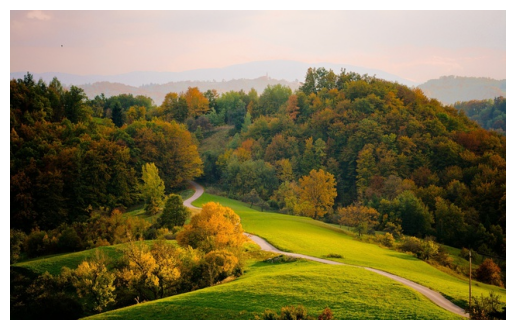

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image_path = 'img/1.jpg'
image = cv.imread(image_path)
height, width, channels = image.shape
file_size = np.prod(image.shape)
print(f'Розмір зображення: {width}x{height} пікселів, {channels} канали')
print(f'Розмір файлу на диску: {file_size} байт')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

2.Імпортувати RGB-зображення Image у напівтоновому форматі. Оцінити його розмір у пікселях та об’єм пам’яті, який він займає на диску. Порівняти результати з попередніми результатами. Пояснити результати.

Розмір зображення у пікселях: 640x400
Об'єм пам'яті на диску у байтах: 256000 байт


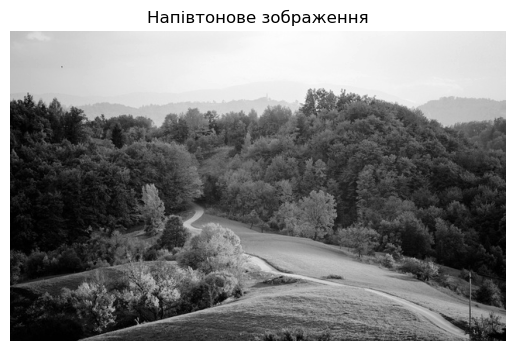

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('img/1.jpg', cv.IMREAD_GRAYSCALE)
height, width = image.shape
image_size_bytes = image.nbytes
print(f'Розмір зображення у пікселях: {width}x{height}')
print(f'Об\'єм пам\'яті на диску у байтах: {image_size_bytes} байт')
plt.imshow(image, cmap='gray')
plt.title('Напівтонове зображення')
plt.axis('off')
plt.show()


RGB зображення мають більший об'єм інформації через наявність трьох каналів кольору для кожного пікселя. У напівтонових зображеннях лише один канал (градація сірого або альфа-канал, якщо він присутній). Тому напівтонові зображення містять менше даних для збереження.

3.Зменшити початкове RGB-зображення Image у разів, візуалізувати його, перевіривши результат масштабування, та експортувати його на диск. Чи змінився об’єм пам’яті, який він займає на диску? Обгрунтувати отриманий результат.

Розмір оригінального зображення: 640x400 
Об'єм пам'яті на диску у байтах: 768000 байт


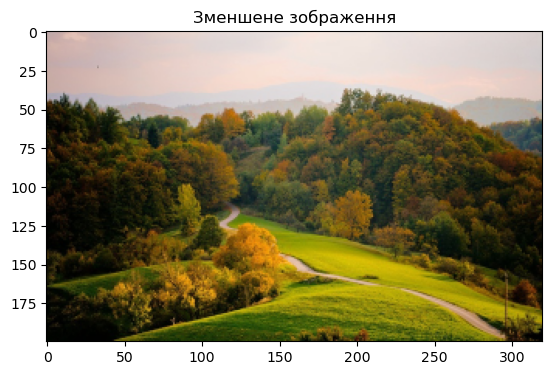

Розмір зменшеного зображення: 320x200 пікселів
Розмір файлу на диску зменшеного зображення: 34977 байт


In [45]:
import cv2
import math
import matplotlib.pyplot as plt
import os
image = cv2.imread('img/1.jpg')
print(f'Розмір оригінального зображення: {image.shape[1]}x{image.shape[0]} ')
print(f'Об\'єм пам\'яті на диску у байтах: {image.size} байт')
rows, cols = image.shape[:2]
new_rows = math.floor(rows /2)
new_cols = math.floor(cols /2)
image_resize = cv2.resize(image, (new_cols, new_rows), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
plt.title('Зменшене зображення')
plt.show()
output_path = 'img/1.4.jpg'
cv2.imwrite(output_path, image_resize)
print(f'Розмір зменшеного зображення: {new_cols}x{new_rows} пікселів')
file_size = os.path.getsize(output_path)
print(f'Розмір файлу на диску зменшеного зображення: {file_size} байт')




Об'єм пам'яті, який займає зображення на диску, залежить від кількості пікселів та рівня стиснення при збереженні. У цьому випадку розмір зображення зменшився на половину, що вплинуло на об'єм файлу.

4.Написати функцію, яка буде виконувати пропорційне зменшення початкового зображення розміром пікселей відповідно до вимоги, щоби зменешене зображення мало ширину пікселей.

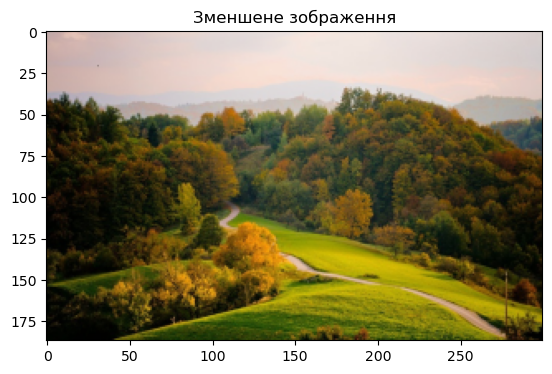

Розмір зменшеного зображення: 300x187 пікселів
Розмір файлу на диску зменшеного зображення: 30475 байт


In [24]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('img/1.jpg')
height, width, channels = image.shape
target_width = 300
new_height = int(height * (target_width / width))
resized_image = cv2.resize(image, (target_width, new_height), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Зменшене зображення')
plt.show()
output_path = 'img/1.5.jpg'
cv2.imwrite(output_path, resized_image)
print(f"Розмір зменшеного зображення: {target_width}x{new_height} пікселів")
import os
file_size = os.path.getsize(output_path)
print(f"Розмір файлу на диску зменшеного зображення: {file_size} байт")


5.Взяти фото з перспективним викривленням на фоні письмового столу. Вирізати зону столу та виконати афінні та перспективні перетворення за трьома точками точками і візуалізовані. В кожному випадку результати мають бути записані на диск.

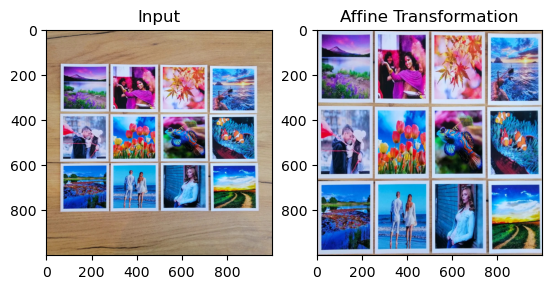

In [46]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('img/2.jpg')

if image is None:
    print("Помилка: Неможливо завантажити зображення.")
else:
    points_input = np.float32(
        [
            [60, 150],       
            [940, 150],   
            [60, 810]    
        ]
    )
    points_output = np.float32(
        [
            [0, 0],                  
            [output_width, 0],       
            [0, output_height]       
        ]
    )

    affine_transform = cv.getAffineTransform(points_input, points_output)
    image_affine_trans = cv.warpAffine(image, affine_transform, (output_width, output_height))
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Input') 
    image_affine_trans_rgb = cv.cvtColor(image_affine_trans, cv.COLOR_BGR2RGB)
    plt.subplot(122)
    plt.imshow(image_affine_trans_rgb)
    plt.title('Affine Transformation')
    cv.imwrite('img/output_image2.jpg', image_affine_trans)
    plt.show()





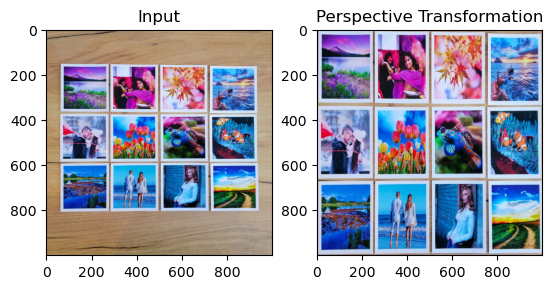

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image = cv.imread('img/2.jpg')
if image is None:
    print("Помилка: Неможливо завантажити зображення.")
else:
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Input')
    points_input = np.float32(
        [
            [60, 150],        
            [940, 150],     
            [940, 810],  
            [60, 810]   
        ]
    )
    output_width = 1000
    output_height = 1000

    points_output = np.float32(
        [
            [0, 0],                  
            [output_width, 0],       
            [output_width, output_height],  
            [0, output_height]        
        ]
    )
    M_perspective_trans = cv.getPerspectiveTransform(points_input, points_output)
    image_perspective_trans = cv.warpPerspective(image, M_perspective_trans, (output_width, output_height))
    image_perspective_trans_rgb = cv.cvtColor(image_perspective_trans, cv.COLOR_BGR2RGB)
    plt.subplot(122)
    plt.imshow(image_perspective_trans_rgb)
    plt.title('Perspective Transformation')
    cv.imwrite('img/output_image_perspective.jpg', image_perspective_trans)
    plt.show()



## Контрольні запитання

1.У чому полягає сенс афінних перетворень?

Сенс афінних перетворень полягає в їхній здатності змінювати форму та розмір об'єктів у двовимірному просторі, зберігаючи паралельність ліній і відношення відстаней між точками. Це робить їх корисними для зміни розміру, обертання та зсуву об'єктів у графіці, обробці зображень і комп'ютерному зорі.

2.Чи є оперції трансляції, масштабування і повороту афінними? Відповідь обгрунтувати.

Афінні перетворення включають в себе трансляцію (зсув), масштабування і поворот як основні операції для модифікації геометричних об'єктів у двовимірному просторі. Трансляція дозволяє зсувати об'єкт вздовж осей X і Y, зберігаючи його форму та розмір. Масштабування дозволяє збільшувати або зменшувати розмір об'єкта вздовж цих осей, з відношенням до початкового розміру. Поворот дозволяє обертати об'єкт навколо центральної точки, зберігаючи паралельність ліній і відношення відстаней між точками.

3.Чи є перспективні перетворення частинним випадком афінних перетворень? Відповідь обгрунтувати.

Перспективні перетворення і афінні перетворення є двома різними класами геометричних перетворень в двовимірному просторі. Основна відмінність полягає в тому, як вони впливають на паралельність ліній та відношення відстаней між точками.У випадку афінних перетворень, які включають в себе трансляцію, масштабування та поворот, паралельні лінії залишаються паралельними після перетворення, і відношення відстаней між точками залишаються незмінними. Це дозволяє зберігати геометричну форму об'єкта. Перспективні перетворення, з іншого боку, не зберігають паралельність ліній та відношення відстаней між точками. Це дозволяє їм моделювати ефекти перспективи, такі як зближеність об'єктів на далекому плані, що знаходяться на однаковій відстані від спостерігача.

## References

1.https://github.com/Vlad1364/test_project/tree/master - посилання на GitHub-репозиторій